# Play Connect4

In [8]:
from AlphaZero.monte_carlo_tree_search import MCTS
from AlphaZero.AlphaZero import AlphaZero
from GameEnvironments.C4 import Game_C4
import numpy as np
from IPython.display import clear_output

In [9]:
game_c4 = Game_C4()
player = 1

player_params = {
    "C": 3,
    "num_searches": 600,
    "dirichlet_epsilon": 0.0,
    "dirichlet_alpha": 0.71
}

alphazero = AlphaZero()

model = alphazero.load_and_resume(game_c4, "/Volumes/Storage/Git Repos/AlphaZero_C4/saved_models")
model.eval()

mcts = MCTS(game_c4, player_params, model)
state = game_c4.initialize()

while True:
    display(game_c4.render_state(state, player))
    if player == 1:
        valid_moves = game_c4.get_valid_moves(state, player)
        print("valid_moves", [i for i in range(game_c4.action_size) if valid_moves[i] == 1])
        action = int(input(f"{player}:"))
        player_name = "player"
            
    else:
        flipped_state = game_c4.change_perspective(state, player)
        mcts_probs = mcts.search(flipped_state, player)
        action = np.argmax(mcts_probs)
        player_name = "bot"
        
    print(action)
    state = game_c4.get_next_state(state, action, player)
    
    value, is_terminal = game_c4.get_value_and_terminated(state, action, player)
    
    if is_terminal:
        clear_output()
        display(game_c4.render_state(state, player))
        if value == 1:
            print(player, "won")
        else:
            print("draw")
        break
        
    player = game_c4.get_opponent(player)
    clear_output()
    print("Last Play:")
    print("Player:", player_name, "Action:", action)

IndexError: list index out of range

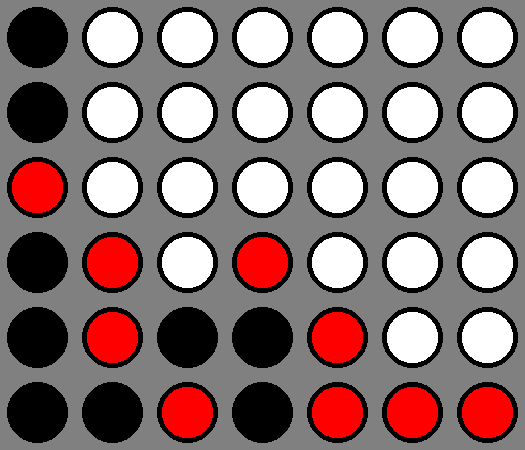

[0.     0.0804 0.046  0.0213 0.733  0.0133 0.042  0.     0.     0.0177
 0.     0.     0.0309 0.0154]
4


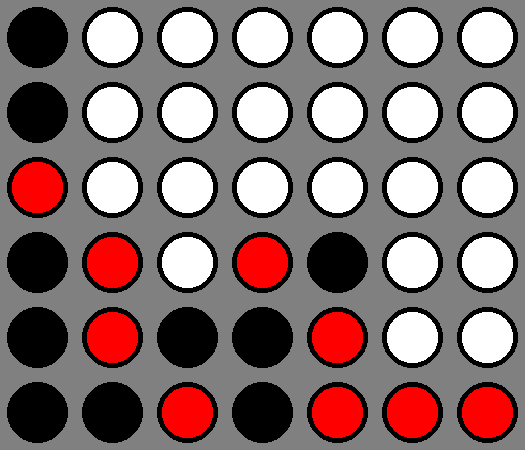

(0, False)

In [ ]:
game_c4 = Game_C4()
player = -1

player_params = {
    "C": 4,
    "num_searches": 10000,
    "dirichlet_epsilon": 0.0,
    "dirichlet_alpha": 0.71
}

alphazero = AlphaZero()

model = alphazero.load_and_resume(game_c4, "/Volumes/Storage/Git Repos/AlphaZero_C4/saved_models/")
model.eval()

mcts = MCTS(game_c4, player_params, model)
state = np.array([[-1, 0, 0, 0, 0, 0, 0],
                  [-1, 0, 0, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0],
                  [-1, 1, 0, 1, 0, 0, 0],
                  [-1, 1, -1, -1, 1, 0, 0],
                  [-1, -1, 1, -1, 1, 1, 1],])
display(game_c4.render_state(state, player))

flipped_state = game_c4.change_perspective(state, player)
mcts_probs = mcts.search(flipped_state, player)
print(mcts_probs)
action = np.argmax(mcts_probs)
print(action)

state = game_c4.get_next_state(state, action, player)
display(game_c4.render_state(state, player))
game_c4.get_value_and_terminated(state, action, player)

In [4]:
def get_encoded_state(state):
    encoded_state = np.stack(
        (state == -1, state == 0, state == 1)
    ).astype(np.float32)
    
    if len(state.shape) == 3:
        encoded_state = np.swapaxes(encoded_state, 0, 1)
    
    return encoded_state

In [7]:
import numpy as np
get_encoded_state(np.zeros((6,7)))

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)